In [1]:
import pandas as pd
import requests
import numpy as np
import statsapi

In [2]:
url = 'http://statsapi.mlb.com/api/v1/schedule/games/?sportId=1'
r = requests.get(url=url).json()
dates = r['dates'][0]['games']
df = pd.DataFrame(dates)
df

,gamePk,gameGuid,link,gameType,season,gameDate,officialDate,status,teams,venue,...,dayNight,scheduledInnings,reverseHomeAwayStatus,inningBreakLength,gamesInSeries,seriesGameNumber,seriesDescription,recordSource,ifNecessary,ifNecessaryDescription
0,745717,107667f4-a7d6-4ee0-91ee-0479bd158455,/api/v1.1/game/745717/feed/live,R,2024,2024-07-22T17:05:00Z,2024-07-22,"{'abstractGameState': 'Final', 'codedGameState...","{'away': {'leagueRecord': {'wins': 50, 'losses...","{'id': 3313, 'name': 'Yankee Stadium', 'link':...",...,day,9,False,120,4,4,Regular Season,S,N,Normal Game
1,746612,2f169a9a-fa83-464b-839f-6c3c4fffc697,/api/v1.1/game/746612/feed/live,R,2024,2024-07-22T22:40:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 49, 'losses...","{'id': 5, 'name': 'Progressive Field', 'link':...",...,night,9,False,120,4,1,Regular Season,S,N,Normal Game
2,745473,bbd9cf73-afa6-4cc5-8785-0a7fa6238609,/api/v1.1/game/745473/feed/live,R,2024,2024-07-22T22:40:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 52, 'losses...","{'id': 31, 'name': 'PNC Park', 'link': '/api/v...",...,night,9,False,120,3,1,Regular Season,S,N,Normal Game
3,746034,b7941d0e-6c24-4f12-99a1-87af6291683e,/api/v1.1/game/746034/feed/live,R,2024,2024-07-22T22:40:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 50, 'losses...","{'id': 4169, 'name': 'loanDepot park', 'link':...",...,night,9,False,120,4,4,Regular Season,S,N,Normal Game
4,747095,19a90f0e-c8b5-48bd-a0c5-47cd59594361,/api/v1.1/game/747095/feed/live,R,2024,2024-07-22T23:20:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 47, 'losses...","{'id': 4705, 'name': 'Truist Park', 'link': '/...",...,night,9,False,120,3,1,Regular Season,S,N,Normal Game
5,745881,641f18f1-e96f-4909-9c36-c83030dfcd15,/api/v1.1/game/745881/feed/live,R,2024,2024-07-22T23:40:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 63, 'losses...","{'id': 3312, 'name': 'Target Field', 'link': '...",...,night,9,False,145,3,1,Regular Season,S,N,Normal Game
6,744988,287f47ef-a785-43c2-b8be-d7ed9ce7310f,/api/v1.1/game/744988/feed/live,R,2024,2024-07-23T00:05:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 27, 'losses...","{'id': 5325, 'name': 'Globe Life Field', 'link...",...,night,9,False,120,4,1,Regular Season,S,N,Normal Game
7,746850,0a47bde8-f628-40ed-a06a-0836386b6512,/api/v1.1/game/746850/feed/live,R,2024,2024-07-23T00:05:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 57, 'losses...","{'id': 17, 'name': 'Wrigley Field', 'link': '/...",...,night,9,False,120,3,1,Regular Season,S,N,Normal Game
8,746280,f4d9f6b4-0bb3-4ae2-9115-c76c02e17aef,/api/v1.1/game/746280/feed/live,R,2024,2024-07-23T00:10:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 51, 'losses...","{'id': 7, 'name': 'Kauffman Stadium', 'link': ...",...,night,9,False,120,3,1,Regular Season,S,N,Normal Game
9,746526,26fdca47-3cc5-447c-8ec7-b8aa0b06c425,/api/v1.1/game/746526/feed/live,R,2024,2024-07-23T00:40:00Z,2024-07-22,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 53, 'losses...","{'id': 19, 'name': 'Coors Field', 'link': '/ap...",...,night,9,False,120,3,1,Regular Season,S,N,Normal Game


In [3]:
HOST = 'https://statsapi.mlb.com'
url = HOST + df.loc[0,'link']
r = requests.get(url=url).json()
player_df = pd.DataFrame(r['gameData']['players'])
player_df_all = pd.DataFrame(['players'])
player_df = player_df.T

In [4]:
player = statsapi.player_stat_data(694973, group= "hitting", type="season", sportId=1)
# float(player['stats'][0]['stats']['avg'])
# print(player)

def get_avg(player_id):
    player = statsapi.player_stat_data(int(player_id), group= "hitting", type="season", sportId=1)
    if player['position'] == 'P':
        return 0
    return float(player['stats'][0]['stats']['avg'])

averages = player_df.id.apply(get_avg)
player_df = player_df.assign(avg=averages.values)

In [5]:
strikezone_size = player_df.strikeZoneTop - player_df.strikeZoneBottom
player_df = player_df.assign(strikezone_size=strikezone_size.values)

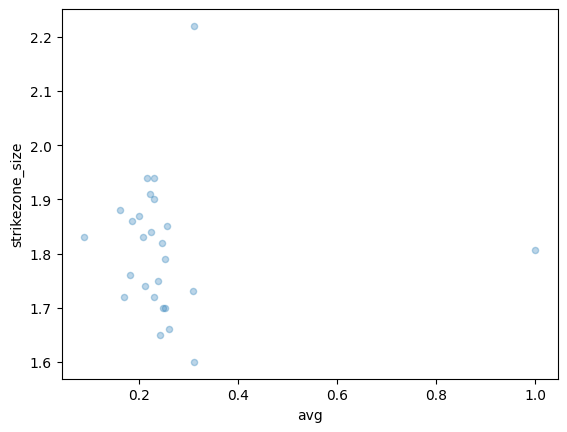

In [6]:
not_pitchers = player_df['avg'] != 0
ax = player_df[not_pitchers].plot.scatter(x='avg', y='strikezone_size', alpha = 0.3)

In [7]:
player = statsapi.player_stat_data(502110, group= "hitting", type="season", sportId=1)
float(player['stats'][0]['stats']['avg'])
print(player)

{'id': 502110, 'first_name': 'J.D.', 'last_name': 'Martinez', 'active': True, 'current_team': 'New York Mets', 'position': 'DH', 'nickname': 'Flaco', 'last_played': None, 'mlb_debut': '2011-07-30', 'bat_side': 'Right', 'pitch_hand': 'Right', 'stats': [{'type': 'season', 'group': 'hitting', 'season': '2024', 'stats': {'gamesPlayed': 69, 'groundOuts': 49, 'airOuts': 58, 'runs': 27, 'doubles': 15, 'triples': 1, 'homeRuns': 10, 'strikeOuts': 82, 'baseOnBalls': 29, 'intentionalWalks': 0, 'hits': 66, 'hitByPitch': 4, 'avg': '.260', 'atBats': 254, 'obp': '.344', 'slg': '.445', 'ops': '.789', 'caughtStealing': 0, 'stolenBases': 0, 'stolenBasePercentage': '.---', 'groundIntoDoublePlay': 9, 'numberOfPitches': 1192, 'plateAppearances': 291, 'totalBases': 113, 'rbi': 40, 'leftOnBase': 124, 'sacBunts': 0, 'sacFlies': 1, 'babip': '.344', 'groundOutsToAirouts': '0.84', 'catchersInterference': 3, 'atBatsPerHomeRun': '25.40'}}]}


In [8]:
def get_babip(player_id):
    player = statsapi.player_stat_data(int(player_id), group= "hitting", type="season", sportId=1)
    if player['position'] == 'P':
        return 0
    return float(player['stats'][0]['stats']['babip'])

def get_num_pitches(player_id):
    player = statsapi.player_stat_data(int(player_id), group= "hitting", type="season", sportId=1)
    if player['position'] == 'P':
        return 0
    return float(player['stats'][0]['stats']['numberOfPitches'])

def get_homeruns(player_id):
    player = statsapi.player_stat_data(int(player_id), group= "hitting", type="season", sportId=1)
    if player['position'] == 'P':
        return 0
    return float(player['stats'][0]['stats']['homeRuns'])

player_babip = player_df.id.apply(get_babip)
player_df = player_df.assign(babip=player_babip.values)

player_num_pitches = player_df.id.apply(get_num_pitches)
player_df = player_df.assign(num_pitches=player_num_pitches.values)

player_homeruns = player_df.id.apply(get_homeruns)
player_df = player_df.assign(homeruns=player_homeruns.values)

player_df

,id,fullName,link,firstName,lastName,primaryNumber,birthDate,currentAge,birthCity,birthStateProvince,...,nickName,nameTitle,nameSuffix,pronunciation,nameMatrilineal,avg,strikezone_size,babip,num_pitches,homeruns
ID543859,543859,Michael Tonkin,/api/v1/people/543859,Michael,Tonkin,50,1989-11-19,34,Glendale,CA,...,NaN,NaN,NaN,NaN,NaN,0.000,2.01,0.000,0.0,0.0
ID670764,670764,Taylor Walls,/api/v1/people/670764,Taylor,Walls,6,1996-07-10,28,Cordele,GA,...,NaN,NaN,NaN,NaN,NaN,0.160,1.88,0.236,416.0,0.0
ID641482,641482,Nestor Cortes,/api/v1/people/641482,Nestor,Cortes,65,1994-12-10,29,Surgidero de Batabano,NaN,...,Hialeah Kid,Jr.,Jr.,NaN,NaN,0.000,1.806,0.000,0.0,0.0
ID542888,542888,Shawn Armstrong,/api/v1/people/542888,Shawn,Armstrong,64,1990-09-11,33,New Bern,NC,...,Armie,NaN,NaN,NaN,NaN,0.000,1.878,0.000,0.0,0.0
ID518934,518934,DJ LeMahieu,/api/v1/people/518934,David,LeMahieu,26,1988-07-13,36,Visalia,CA,...,Big Fundy,NaN,NaN,luh-MAY-hyoo,NaN,0.181,1.76,0.216,547.0,1.0
ID664040,664040,Brandon Lowe,/api/v1/people/664040,Brandon,Lowe,8,1994-07-06,30,Suffolk,VA,...,Bamm-Bamm,NaN,NaN,rhymes with 'now',NaN,0.238,1.75,0.277,783.0,10.0
ID671737,671737,Taj Bradley,/api/v1/people/671737,Taj,Bradley,45,2001-03-20,23,Los Angeles,CA,...,NaN,NaN,NaN,NaN,NaN,0.000,1.878,0.000,0.0,0.0
ID664126,664126,Pete Fairbanks,/api/v1/people/664126,Peter,Fairbanks,29,1993-12-16,30,Milwaukee,WI,...,NaN,NaN,NaN,NaN,NaN,0.000,1.979,0.000,0.0,0.0
ID657077,657077,Alex Verdugo,/api/v1/people/657077,Alexander,Verdugo,24,1996-05-15,28,Tucson,AZ,...,Dugie,NaN,NaN,vehr-DOO-go,NaN,0.229,1.94,0.247,1554.0,10.0
ID676356,676356,Jonny DeLuca,/api/v1/people/676356,Jonathan,DeLuca,21,1998-07-10,26,Thousand Oaks,CA,...,NaN,NaN,NaN,NaN,NaN,0.168,1.72,0.214,664.0,3.0


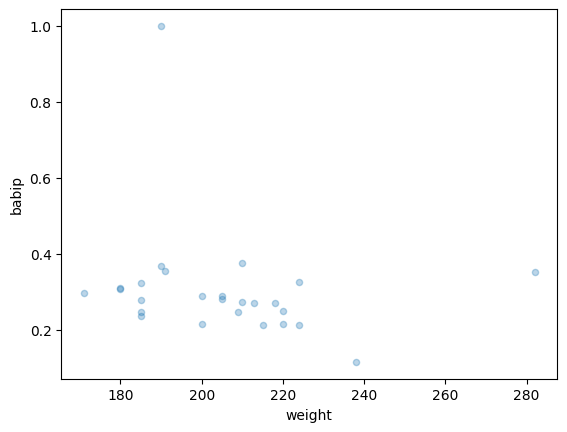

In [9]:
ax = player_df[not_pitchers].plot.scatter(x='weight', y='babip', alpha = 0.3)

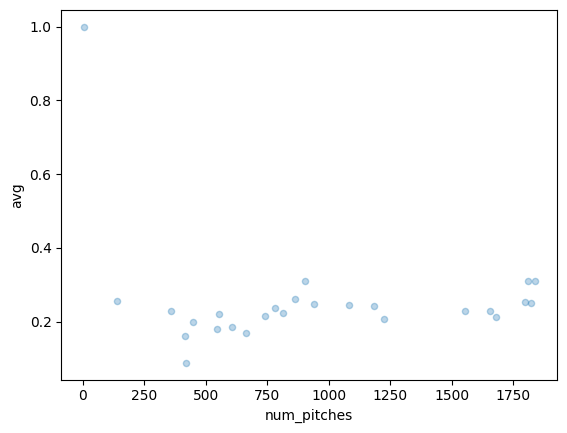

In [10]:
ax = player_df[not_pitchers].plot.scatter(x='num_pitches', y='avg', alpha = 0.3)

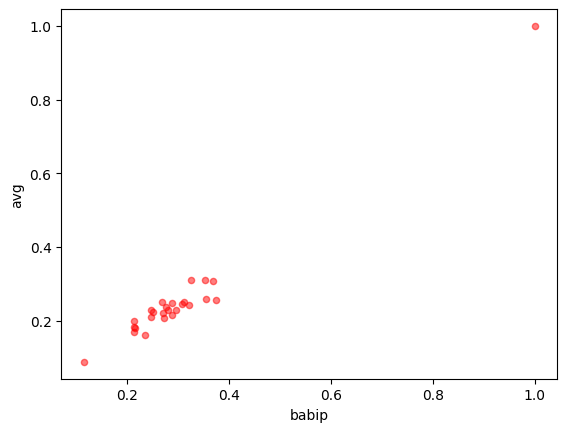

In [11]:
ax = player_df[not_pitchers].plot.scatter(x='babip', y='avg', alpha = 0.5, color = 'red')

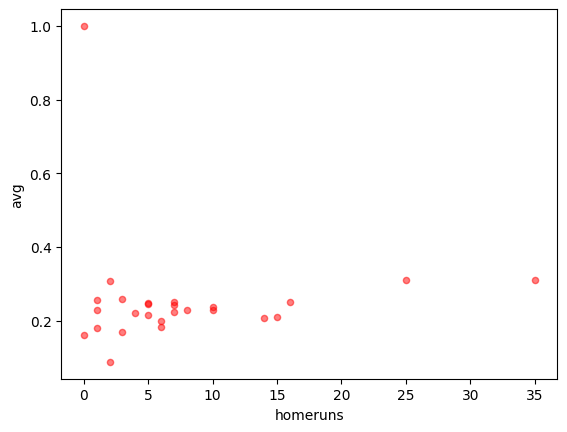

In [12]:
ax = player_df[not_pitchers].plot.scatter(x='homeruns', y='avg', alpha = 0.5, color = 'red')

Text(0.5, 0, 'Batting Average')

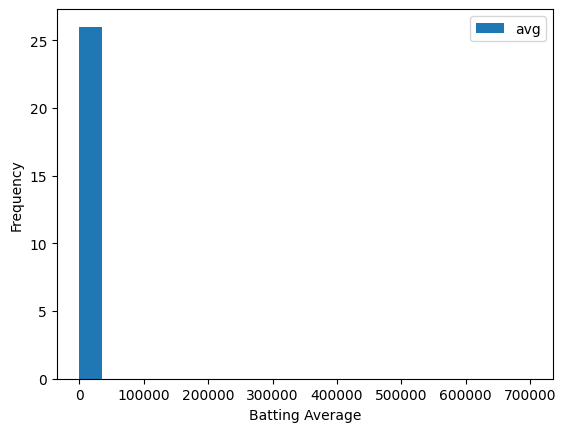

In [13]:
ax = player_df[not_pitchers].plot.hist(column='avg', bins = 20)
ax.set_xlabel('Batting Average')

Text(0, 0.5, 'Primary Position')

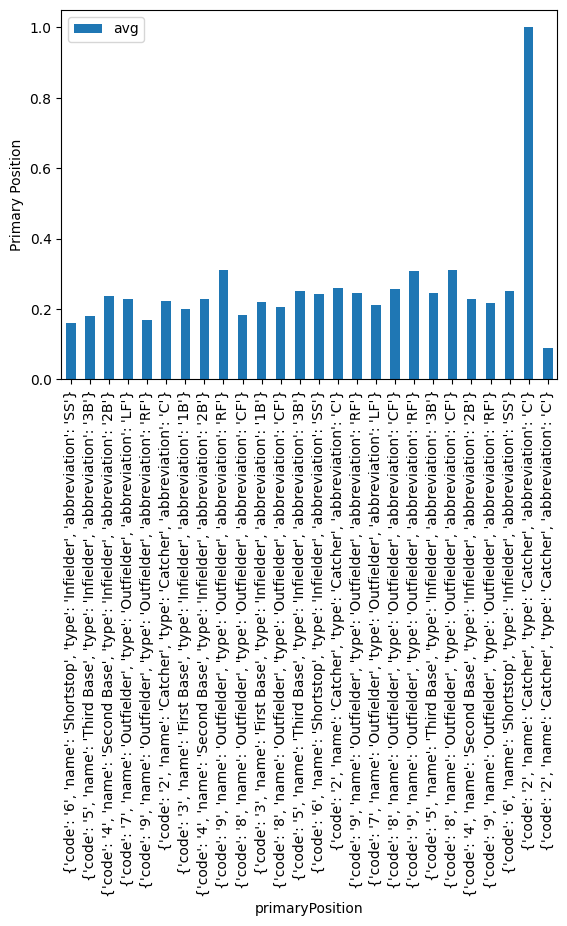

In [14]:
ax = player_df[not_pitchers].plot.bar(x='primaryPosition', y='avg')
ax.set_ylabel('Batting Average')
ax.set_ylabel('Primary Position')

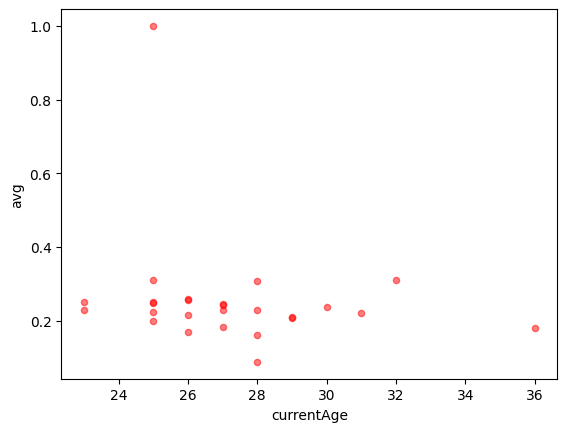

In [16]:
ax = player_df[not_pitchers].plot.scatter(x='currentAge', y='avg', alpha = 0.5, color = 'red')